<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **결정 트리**

## **로지스틱 회귀로 와인 분류하기**

### **데이터 준비**

데이터를 준비하겠습니다. 이번에 사용할 데이터셋은 와인 샘플 데이터입니다.

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine)

      alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]


총 샘플 6496개로 이루어진 판다스 데이터프레임이며, 네 번째 열은 타깃값입니다. 0(음성 클래스)이면 레드 와인, 1(양성 클래스)이면 화이트 와인입니다. 화이트 와인을 골라내는 문제입니다.

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


결측치는 없습니다. 만약 결측치가 있다면 데이터를 제거하거나 평균값으로 채우고 사용하면 됩니다. 최선의 방법이 정해진 건 아니므로 두 방법 모두 사용해보고 최선을 선택합니다.

`describe()` 메서드를 사용하여 열에 대한 간략한 통계를 출력하겠습니다.

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


개수, 평균, 표준편차, 최소, 1사분위수 ~ 최대까지 알 수 있습니다. 만약 데이터 개수가 짝수개라서 중앙값을 선택하기 어려운 경우 가운데 값 2개의 평균을 사용합니다. 각 특성의 스케일이 다르므로 `StandardScaler` 클래스를 사용하여 특성을 표준화 전처리 하겠습니다. 먼저 판다스 데이터프레임을 넘파이 배열로 바꾸겠습니다.

In [5]:
# 특성만 골라서 2차원 리스트로 만듭니다.
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
# 타깃만 골라서 1차원 리스트로 만듭니다.
target = wine['class'].to_numpy()

print(f'특성 데이터:\n{data[:5]}')
print(f'타깃 데이터: {target[:5]}')

특성 데이터:
[[9.4  1.9  3.51]
 [9.8  2.6  3.2 ]
 [9.8  2.3  3.26]
 [9.8  1.9  3.16]
 [9.4  1.9  3.51]]
타깃 데이터: [0. 0. 0. 0. 0.]


훈련 세트와 테스트 세트로 나누겠습니다. 샘플 개수가 충분히 많으므로 20%만 테스트 세트로 삼겠습니다.

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

print(f'훈련 세트 크기:   {train_input.shape}')
print(f'테스트 세트 크기: {test_input.shape}')

훈련 세트 크기:   (5197, 3)
테스트 세트 크기: (1300, 3)


`StandardScaler` 클래스를 사용하여 훈련 세트를 표준화 전처리 하겠습니다.

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]


### **로지스틱 회귀 모델 훈련하기**

로지스틱 회귀 모델을 훈련하겠습니다.

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {lr.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {lr.score(test_scaled, test_target)}')

훈련 세트 점수:   0.7808350971714451
테스트 세트 점수: 0.7776923076923077


두 점수 모두 낮으므로 과소적합입니다. `c` 매개변수 값을 바꿔서 규제를 조절하거나, `solver` 매개변수 값을 바꿔서 다른 알고리즘을 선택하거나, 다항 특성을 추가해볼 수 있습니다.

가중치를 확인하겠습니다.

In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


로지스틱 회귀 모델은 아래 방정식을 학습했습니다. $y$가 0보다 크면 화이트 와인으로 분류하고, 0보다 작으면 레드 와인으로 분류합니다. 

$$y = (alcohol x 0.51) + (sugar x 1.67) + (pH x -0.69) + 1.82$$

다만 가중치가 어떻게 형성되었는지, 숫자는 어떤 의미를 가지고 있는지 정확하게 이해하기 어렵고 훈련 결과를 설명하기도 어렵습니다.

## **결정 트리**

**결정 트리(Decision Tree)**는 예/아니오 질문을 지속하면서 정답을 찾는 알고리즘입니다. 질문을 여러 번 추가하면서 분류 정확도를 높일 수 있습니다. 예측 과정을 이해하기 쉽고 출력값에 대하여 메커니즘을 설명하기 쉽습니다. 표준화 전처리 작업이 필요하지 않고 성능 또한 뛰어납니다. **앙상블 학습(ensemble learning)** 알고리즘의 기반이며, **5-3 트리의 앙상블**에서 앙상블 학습을 다룰 예정입니다. 

결정 트리가 구현된 클래스는 분류 버전인 `DecisionTreeClassifier`와 회귀 버전인 `DecisionTreeClassifier`입니다. 매개변수 목록은 아래와 같습니다.

- `splitter`: 노드를 분할하는 전략을 선택하는 매개변수입니다. 기본값은 `best`로 정보 이득이 최대가 되도록 분할합니다. `random`은 임의로 노드를 분할합니다.

- `min_samples_split`: 노드를 나누기 위한 최소 샘플 개수를 지정하는 매개변수입니다. 기본값은 `2`입니다.

- `max_feature`: 최적의 분할을 위해 탐색할 특성의 개수를 지정하는 매개변수입니다. 기본값은 `None`으로 모든 특성을 사용합니다.

코드를 구현하면서 설명을 이어가겠습니다.

### **결정 트리 모델 만들기**

결정 트리 모델을 만들고 정확도를 파악하겠습니다. 결정 트리 알고리즘은 **노드(node)**에서 최적의 분할을 찾기 전에 특성의 순서를 섞습니다(노드에 대한 설명은 아래에서 이어갑니다). 실행할 때마다 점수가 달라지기 때문입니다. 여기에서는 실습 결과와 교재 내용이 같게 만들기 위해 `random_state = 42`로 지정합니다. 실전에서는 지정할 필요가 없습니다.

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {dt.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {dt.score(test_scaled, test_target)}')

훈련 세트 점수:   0.996921300750433
테스트 세트 점수: 0.8592307692307692


과대적합된 모델입니다.

### **결정 트리 모델을 그림으로 출력하기**

`plot_tree()` 메서드를 사용하여 결정 트리 모델을 그림으로 출력하겠습니다.

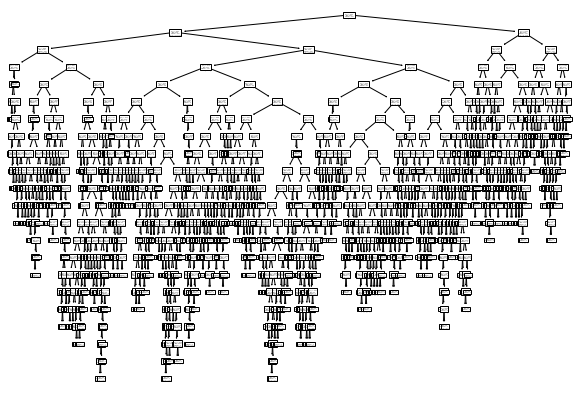

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)

plt.show()

**노드(node)**는 사전적 의미로 '(줄기의)마디', '교점', '접속점'을 의미합니다. 결정 트리에서 노드는 훈련 데이터의 특성에 대한 테스트를 표현합니다. 예컨대 당도가 -0.239보다 작거나 같은지 테스트합니다. 그림상에서 맨 위의 네모난 상자를 **루트 노드(root node)**라고 부르고, 맨 아래 끝에 달린 네모난 상자를 **리프 노드(leaf node)**라고 부릅니다.

노드 아래에 붙은 선은 **가지(branch)**이며, 테스트의 결과(True, False)를 나타냅니다. 일반적으로 노드 1개는 가지 2개를 가집니다.

`plot_tree()` 메서드의 매개변수 값을 다르게 지정하여 트리 깊이를 제한한 그림을 출력하겠습니다. 아래는 `plot_tree()` 메서드가 가진 매개변수의 목록입니다.

- `max_depth`: 노드의 깊이를 지정하는 매개변수입니다. `1`로 지정하면 루트 노드를 제외하고 노드 하나를 그립니다. `2`로 지정하면 노드 두 개를 그립니다.

- `filled`: 클래스의 비중에 맞추어 노드의 색을 칠하는 매개변수입니다. 기본값은 `False`입니다.

- `feature_names`: 특성의 이름을 전달하는 매개변수입니다. 지정하지 않으면 'X[1]' 같은 식으로 표현됩니다.

노드 깊이를 `1`로 지정하여 결정 트리를 그리겠습니다.

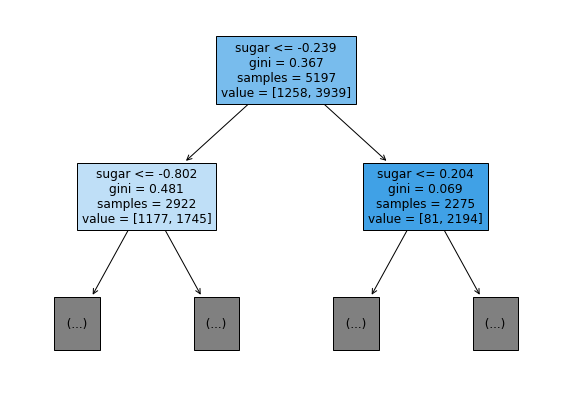

In [12]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

* 루트 노드

sugar가 -0.239 이하인지 질문합니다. 어떤 샘플의 sugar가 -0.239 이하라면(True) 왼쪽 노드로 이동하고, 아니라면(False) 오른쪽 노드로 이동합니다.
'gini'는 **지니 불순도(Gini impurity)**를 의미합니다. 아래에서 따로 상세하게 설명하겠습니다. 'samples'는 총 샘플 수(5,197개)를 나타냅니다. 'value'는 음성 클래스(레드 와인) 1,258개, 양성 클래스(화이트 와인) 3,939개를 나타냅니다.

* 왼쪽 노드

루트 노드와 달리 sugar가 더 낮은지 질문합니다. 여기서도 True이면 왼쪽 노드로 이동하고, False이면 오른쪽 노드로 이동합니다. 'samples'와 'value'는 루트 노드와는 다른 수치를 나타냅니다. 루트 노드보다 양성 클래스의 비율이 크게 줄어들었습니다.

* 오른쪽 노드

음성 클래스가 81개, 양성 클래스가 2,194개로 대부분의 양성 클래스(화이트 와인)가 이 노드로 이동했습니다. 이 노드의 바탕 색깔은 루트 노드보다 더 진하고, 왼쪽 노드의 바탕 색깔은 여기 노드보다 더 연합니다. 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시되는 것입니다.

* 결론

리프 노드에서 가장 많은 클래스가 예측 클래스가 됩니다. 즉, 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만듭니다. k-최근접 이웃과 비슷하다고도 볼 수 있습니다. 만약 이 결정 트리의 성장을 여기서 멈추면 왼쪽 노드와 오른쪽 노드 모두 양성 클래스의 개수가 많기 때문에 양성 클래스로 예측할 것입니다. 회귀의 경우는 `DecisionTreeRegressor` 클래스를 사용하며, 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용합니다.

### **불순도**

위 결정 트리에서 'gini'는 **지니 불순도(Gini impurity)**를 의미합니다. 결정 트리가 최적의 질문을 찾기 위한 기준입니다. `DecisionTreeClassifier` 클래스의 `criterion` 매개변수는 노드에서 데이터 분할 기준을 정하는 매개변수이며, 기본값이 바로 지니 불순도를 의미하는 `gini`입니다.

지니 불순도를 구하는 공식은 아래와 같습니다.

$$지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)$$

다중 클래스라면 수식에 포함되는 클래스 비율의 수가 늘어납니다. 위 결정 트리의 루트 노드의 값을 공식에 대입하여 계산해보겠습니다.

$$gini = 1 - ((1258 / 5197)^2 + (3939 / 5197)^2) = 0.367$$

가령 샘플 100개를 가진 어떤 노드의 클래스 비율이 0.5씩이면 지니 불순도는 0.5가 됩니다. 가장 부적절한 값입니다. 

$$gini = 1 - ((50 / 100)^2 + (50 / 100)^2) = 0.5$$

노드가 클래스를 하나만 가졌다면 지니 불순도는 0이 되고, 이 노드를 **순수 노드**라고 부릅니다.

$$gini = 1 - 1 - ((0 / 100)$^2$ + (100 / 100)$^2$) = 0$$

결정 트리 모델은 **부모 노드(parent node)**와 **자식 노드(child node)** 간 불순도 차이를 가능하면 크도록 트리를 성장시킵니다. 참고로 부모 노드와 자식 노드 간 불순도 차이를 **정보 이득(information gain)**이라고 부릅니다. 아래는 정보 이득을 계산하는 수식입니다. 

$$정보 이득 = 부모 불순도 - (왼쪽 노드 샘플 수 / 부모 노드 샘플 수) \times 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모 노드 샘플 수) \times 오른쪽 노드 불순도$$

위 결정 트리의 값을 공식에 대입하여 계산해보겠습니다.

$$정보 이득 = 0.367 - (2922 / 5197) \times 0.481 - (2275 / 5197) \times 0.069 = 0.066$$

다시 한 번 강조하지만 결정 트리 알고리즘은 불순도 기준을 사용하여 정보 이득이 최대가 되도록 노드를 나눕니다. 노드를 순수하게 나눌수록 정보 이득이 커집니다.

다른 불순도 기준이라면 **엔트로피 불순도(entropy impurity)**가 있습니다. `DecisionTreeClassifier` 클래스의 `criterion` 매개변수에 `enthropy`를 지정하면 엔트로피 불순도를 사용할 수 있습니다. 엔트로피 불순도는 밑이 2인 로그를 사용하여 곱합니다. 엔트로피 불순도를 구하는 공식은 아래와 같습니다.

$$엔트로피 불순도 = -음성클래스 비율 \times log_2(음성 클래스 비율) - 양성 클래스 비율 \times log_2(양성 클래스 비율)$$

위 결정 트리의 루트 노드의 값을 공식에 대입하여 계산해보겠습니다.

$$entropy = -(1258 / 5197) \times log_2(1258 / 5197) - (3939 / 5197) \times log_2(3939 / 5197) = 0.798$$

보통 지니 불순도와 엔트로피 불순도가 만든 결과 차이는 크지 않습니다.

### **가지치기**

열매를 잘 맺기 위해 나무를 가지치기 하는 것처럼 결정 트리도 무작정 끝까지 자라지 못하도록 가지치기를 해야 합니다. 위 결정 트리 모델의 점수는 훈련 세트 0.996, 테스트 세트 0.859이므로 과대적합 상태입니다. 가지치기를 하지 않고 끝까지 뻗어났기 때문에 훈련 세트 점수가 테스트 세트 점수보다 크게 높은 것입니다. 이를 두고 '일반화가 잘 안 될 것 같다'라고 표현합니다.

`max_depth` 매개변수를 조정하여 트리의 최대 깊이를 지정하면 가지치기의 정도를 조정할 수 있습니다.

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


훈련 세트 점수는 낮아지고, 테스트 세트 점수는 거의 그대로입니다. 결정 트리를 그려보겠습니다.

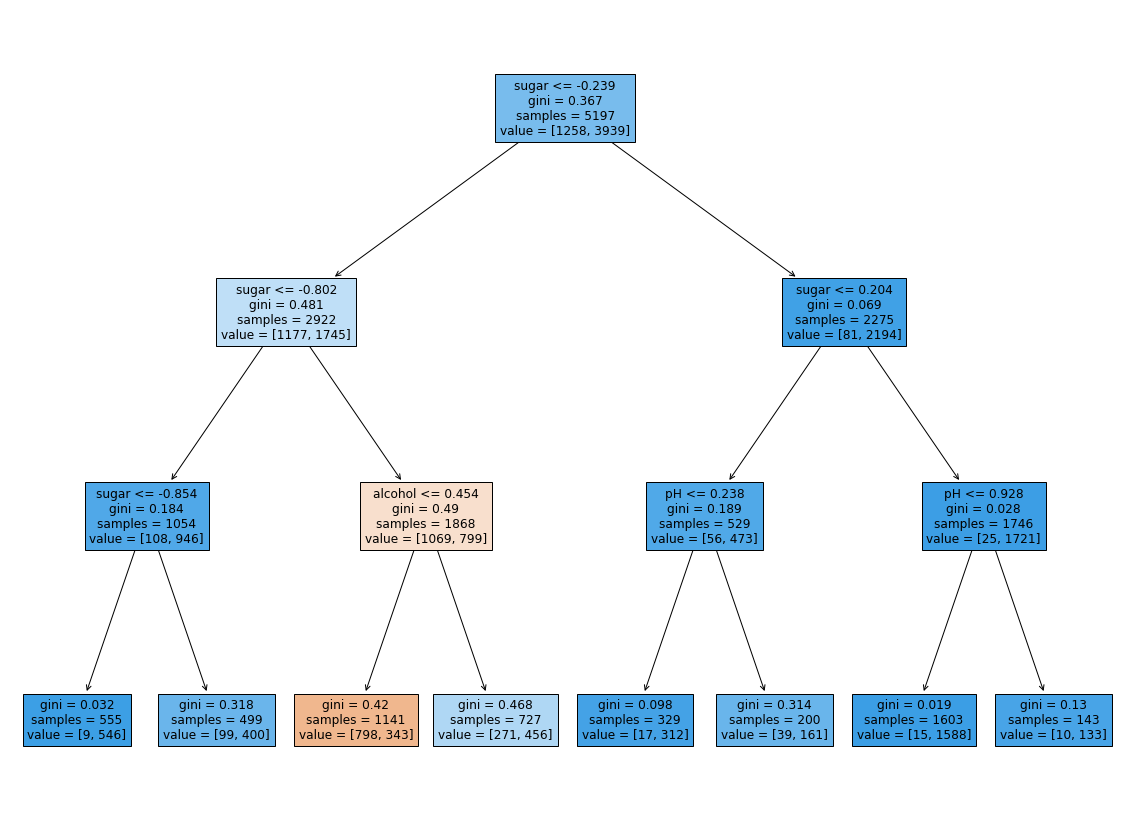

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

각 노드의 첫 번째 줄에 위치한 특성(sugar, alcohol, pH)이 계속 바뀝니다. 이 바뀐 특성을 기준으로 훈련 세트를 나눕니다. 루트 노드는 깊이가 0, 다음 노드는 깊이가 1, ... , 리프 노드는 깊이가 3입니다. 왼쪽에서 세 번째에 있는 리프 노드만 음성 클래스가 [798, 343]로 더 많습니다. 이 노드에 도착해야만 레드 와인으로 예측합니다. 이 노드까지 도착하려면 'sugar'는 -0.239보다 작거나 같고(True), -0.802보다 크며(False), 'alcohol'은 0.454보다 작거나 같아야(True) 합니다. 즉, 'sugar'가 -0.802보다 크고 -0.239보다 작거나 같은 와인 중에 'alcohol'이 0.454와 작거나 같은 것이 레드 와인입니다.

### **전처리가 불필요한 결정 트리**

앞서 불순도를 기준으로 샘플을 나눈다고 서술하였고, 불순도는 클래스별 비율로 계산했습니다. 따라서 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향이 없습니다. 결정 트리 알고리즘에서는 표준화 전처리를 할 필요가 없습니다.

전처리 하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 훈련해보겠습니다.

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=3)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


표준화 전처리 한 훈련 세트와 테스트를 훈련한 점수와 같습니다. 특성값의 스케일은 결정 트리 알고리즘에 영향이 전혀 없습니다.

결정 트리를 그려보겠습니다.

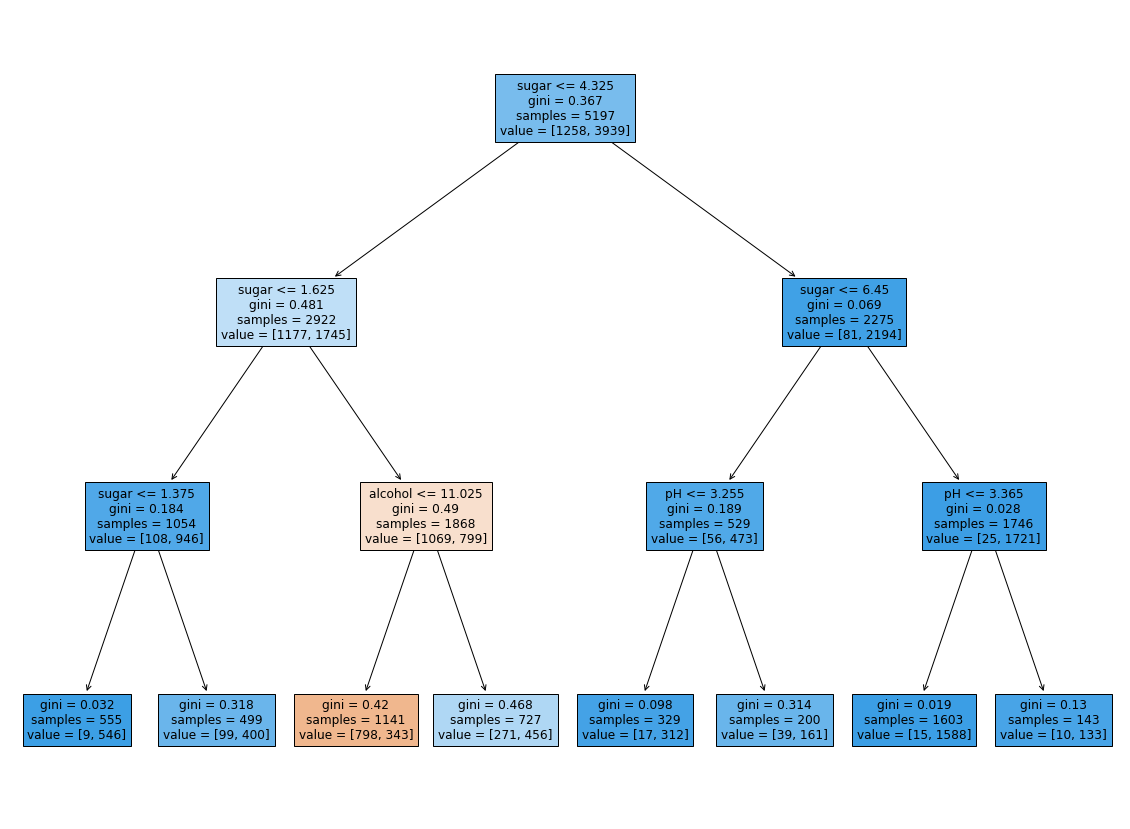

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

결과는 같지만 특성값을 표준점수로 바꾸지 않아서 훨씬 이해하기 쉬워졌습니다.

### **특성 중요도**

**특성 중요도(feature importance)**는 적용한 결정 트리 알고리즘에서 가장 유용한 특성을 의미합니다. 루트 노드와 깊이 1에서 'sugar'를 사용했으므로 'sugar'가 가장 유용한 특성일 가능성이 높습니다. 결정 트리의 특성 중요도는 특성 선택에 활용할 수 있습니다.

특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산합니다. 직접 계산하여 구할 일은 거의 없습니다. 

특성 중요도를 확인하겠습니다. 특성 중요도는 `feature_importances_` 속성에 저장되어 있습니다.

In [16]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


특성의 순서대로 alcohol = 0.12, sugar = 0.87, pH = 0.01을 나타내며 모두 더하면 1이 됩니다. 루트 노드와 깊이가 1인 노드에서 'sugar'를 사용했으므로 'sugar'가 가장 유용한 특성으로 추측 가능할 수 있습니다. 수치상으로도 'sugar'의 수치가 가장 높습니다.

## **마무리**

* 확인 문제

위에서 `max_depth = 3`으로 지정하여 좌우가 대칭인 트리를 만들었습니다. 결정 트리 클래스가 제공하는 매개변수 중에 `min_impurity_decrease` 매개변수를 사용하여 가지치기를 해보겠습니다. 어떤 노드의 $정보 이득 \times (노드의 샘플 수) / (전체 샘플 수)$로 계산한 값이 이 매개변수보다 작으면 더 이상 분할하지 않습니다. 이 매개변수의 값을 `0.0005`로 지정하고 결정 트리를 만드세요.

0.8874350586877044
0.8615384615384616


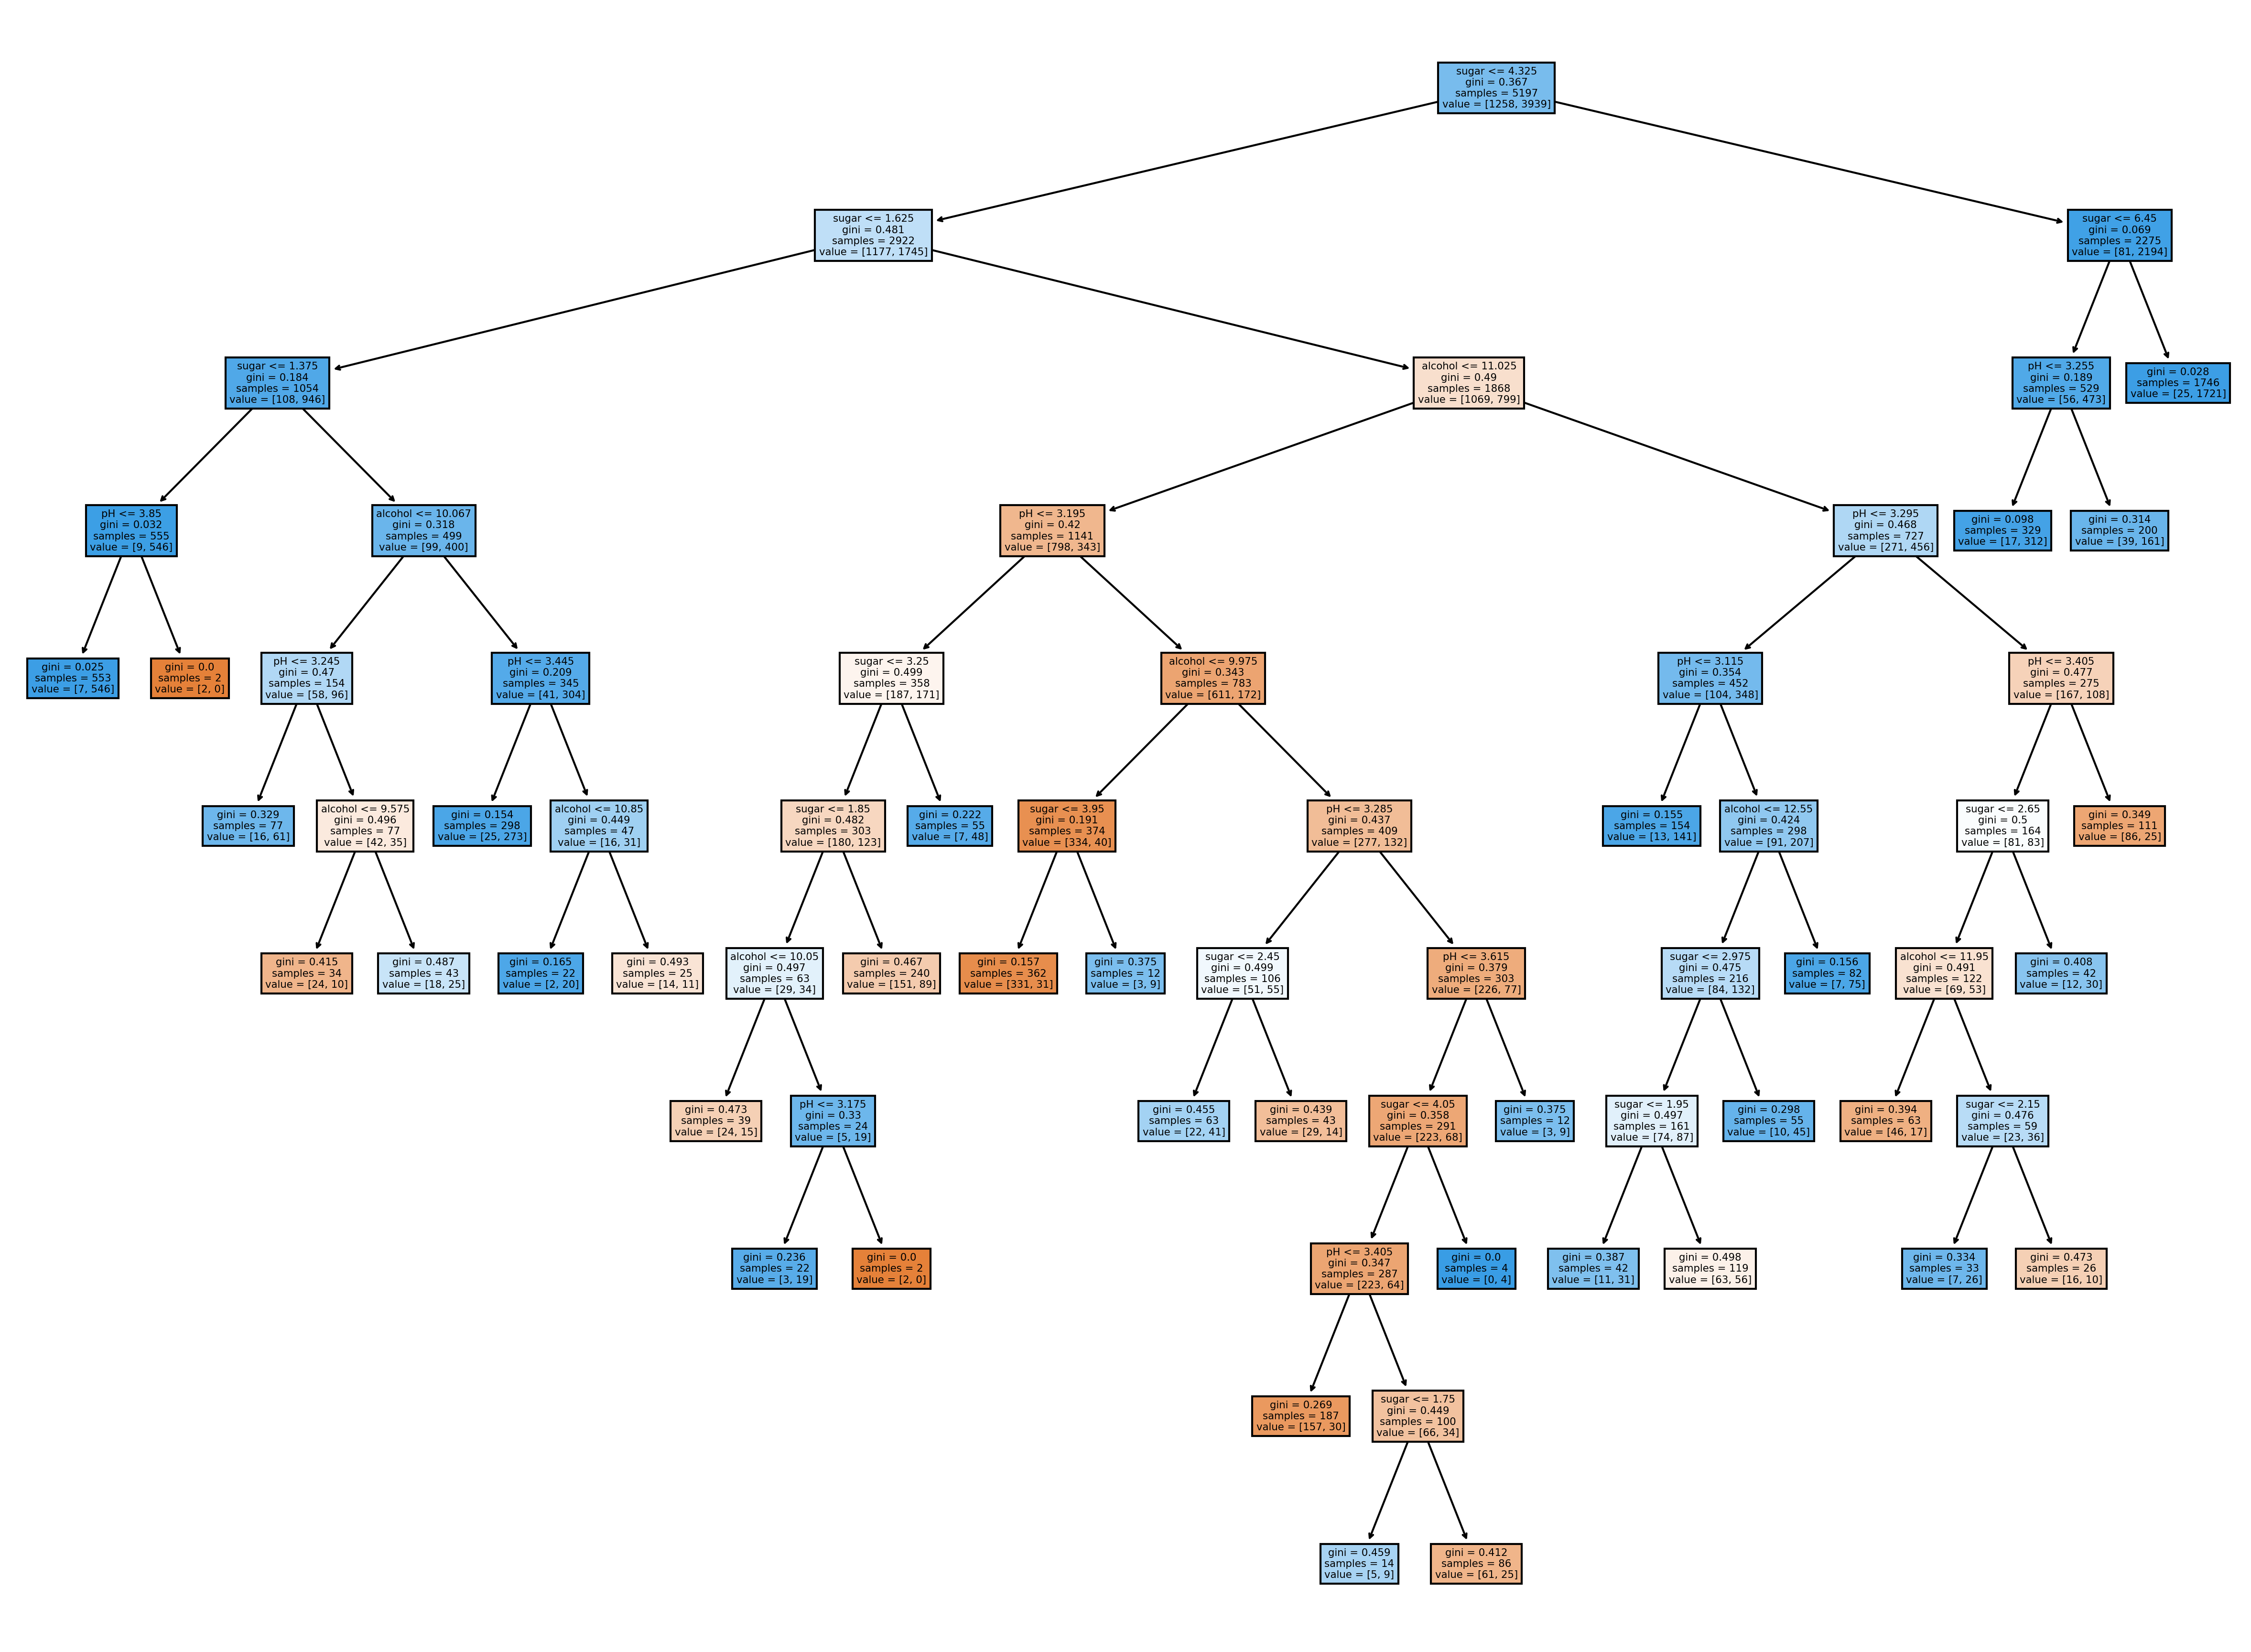

In [17]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20, 15), dpi=300)    # `dpi` 매개변수는 해상도를 의미합니다. 기본값은 `100`입니다.
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

좌우가 균일하지 않은 트리가 만들어졌습니다.